# 1. Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 2. tdcsfog Data Selection

## a.) Setting Data Path

In [2]:
main_path = '../data'

## b.) Loading tdcsfog metadata

In [3]:
tdcsfog =  pd.read_csv(main_path + '/raw/defog_metadata.csv')
meta = tdcsfog
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          137 non-null    object
 1   Subject     137 non-null    object
 2   Visit       137 non-null    int64 
 3   Medication  137 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


## c.) Loading subject Data

In [4]:
subject = pd.read_csv(main_path + '/raw/subjects.csv')
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         111 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   172 non-null    float64
 6   UPDRSIII_Off  132 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB


In [5]:
subject = subject.fillna(0)
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject       173 non-null    object 
 1   Visit         173 non-null    float64
 2   Age           173 non-null    int64  
 3   Sex           173 non-null    object 
 4   YearsSinceDx  173 non-null    float64
 5   UPDRSIII_On   173 non-null    float64
 6   UPDRSIII_Off  173 non-null    float64
 7   NFOGQ         173 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 10.9+ KB


## d.) Loading event Data

In [6]:
events = pd.read_csv(main_path + '/raw/events.csv')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          3544 non-null   object 
 1   Init        3544 non-null   float64
 2   Completion  3544 non-null   float64
 3   Type        2502 non-null   object 
 4   Kinetic     2502 non-null   float64
dtypes: float64(3), object(2)
memory usage: 138.6+ KB


In [7]:
events["Event_Duration"] = events["Completion"] - events["Init"]
events = events.dropna()
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 3543
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2502 non-null   object 
 1   Init            2502 non-null   float64
 2   Completion      2502 non-null   float64
 3   Type            2502 non-null   object 
 4   Kinetic         2502 non-null   float64
 5   Event_Duration  2502 non-null   float64
dtypes: float64(4), object(2)
memory usage: 136.8+ KB


## e.) Loading tasks Data

In [8]:
tasks = pd.read_csv(main_path + '/raw/tasks.csv')
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2817 non-null   object 
 1   Begin   2817 non-null   float64
 2   End     2817 non-null   float64
 3   Task    2817 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.2+ KB


In [9]:
tasks["Tasks_Duration"] = tasks["End"] - tasks["Begin"]
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              2817 non-null   object 
 1   Begin           2817 non-null   float64
 2   End             2817 non-null   float64
 3   Task            2817 non-null   object 
 4   Tasks_Duration  2817 non-null   float64
dtypes: float64(3), object(2)
memory usage: 110.2+ KB


## f.) Data Merging

In [10]:
meta = pd.merge(meta, subject, how='inner', on='Subject')
meta.head()

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  02ab235146  e1f62e        2         on      1.0   79   F           8.0   
1  02ab235146  e1f62e        2         on      2.0   79   F           8.0   
2  9506859311  e1f62e        2        off      1.0   79   F           8.0   
3  9506859311  e1f62e        2        off      2.0   79   F           8.0   
4  02ea782681  ae2d35        2         on      1.0   67   M           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ  
0         52.0          55.0     28  
1         38.0          64.0     28  
2         52.0          55.0     28  
3         38.0          64.0     28  
4         15.0          48.0     23

In [11]:
meta = pd.merge(meta, events, how='inner', on='Id')
meta.head()

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
1  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
2  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
3  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
4  4c0aec9035  ae2d35        2        off      1.0   67   M           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ      Init  Completion  Type  Kinetic  \
0         15.0          48.0     23  1377.175    1378.089  Turn      1.0   
1         15.0          48.0     23  1466.410    1466.788  Turn      1.0   
2         14.0          57.0     19  1377.175    1378.089  Turn      1.0   
3         14.0          57.0     19  1466.410    1466.788  Turn      1.0   
4         15.0          48.0     23   136.141     138.973  Turn      1.0   

   Event_Duration  
0           0.914  
1           0.378  
2           0.914  
3           0.378  
4           2.832

In [12]:
meta = pd.merge(meta, tasks, how='inner', on='Id')
meta = meta.sort_values(['Id', 'Init', 'Begin', 'Visit_y'], ignore_index=True)
meta.head()

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
1  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
2  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
3  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
4  02ea782681  ae2d35        2         on      1.0   67   M           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ      Init  Completion  Type  Kinetic  \
0         15.0          48.0     23  1377.175    1378.089  Turn      1.0   
1         14.0          57.0     19  1377.175    1378.089  Turn      1.0   
2         15.0          48.0     23  1377.175    1378.089  Turn      1.0   
3         14.0          57.0     19  1377.175    1378.089  Turn      1.0   
4         15.0          48.0     23  1377.175    1378.089  Turn      1.0   

   Event_Duration    Begin      End   Task  Tasks_Duration  
0           0.914   10.000   21.618    4MW          11.618  
1           0.914   10.000   21.618    4MW          11.618  
2           0.914   99.404  111.200  4MW-C          11.796  
3           0.914   99.404  111.200  4MW-C          11.796  
4           0.914  174.440  177.909    MB1           3.469

## g.) Data Ploting - 1

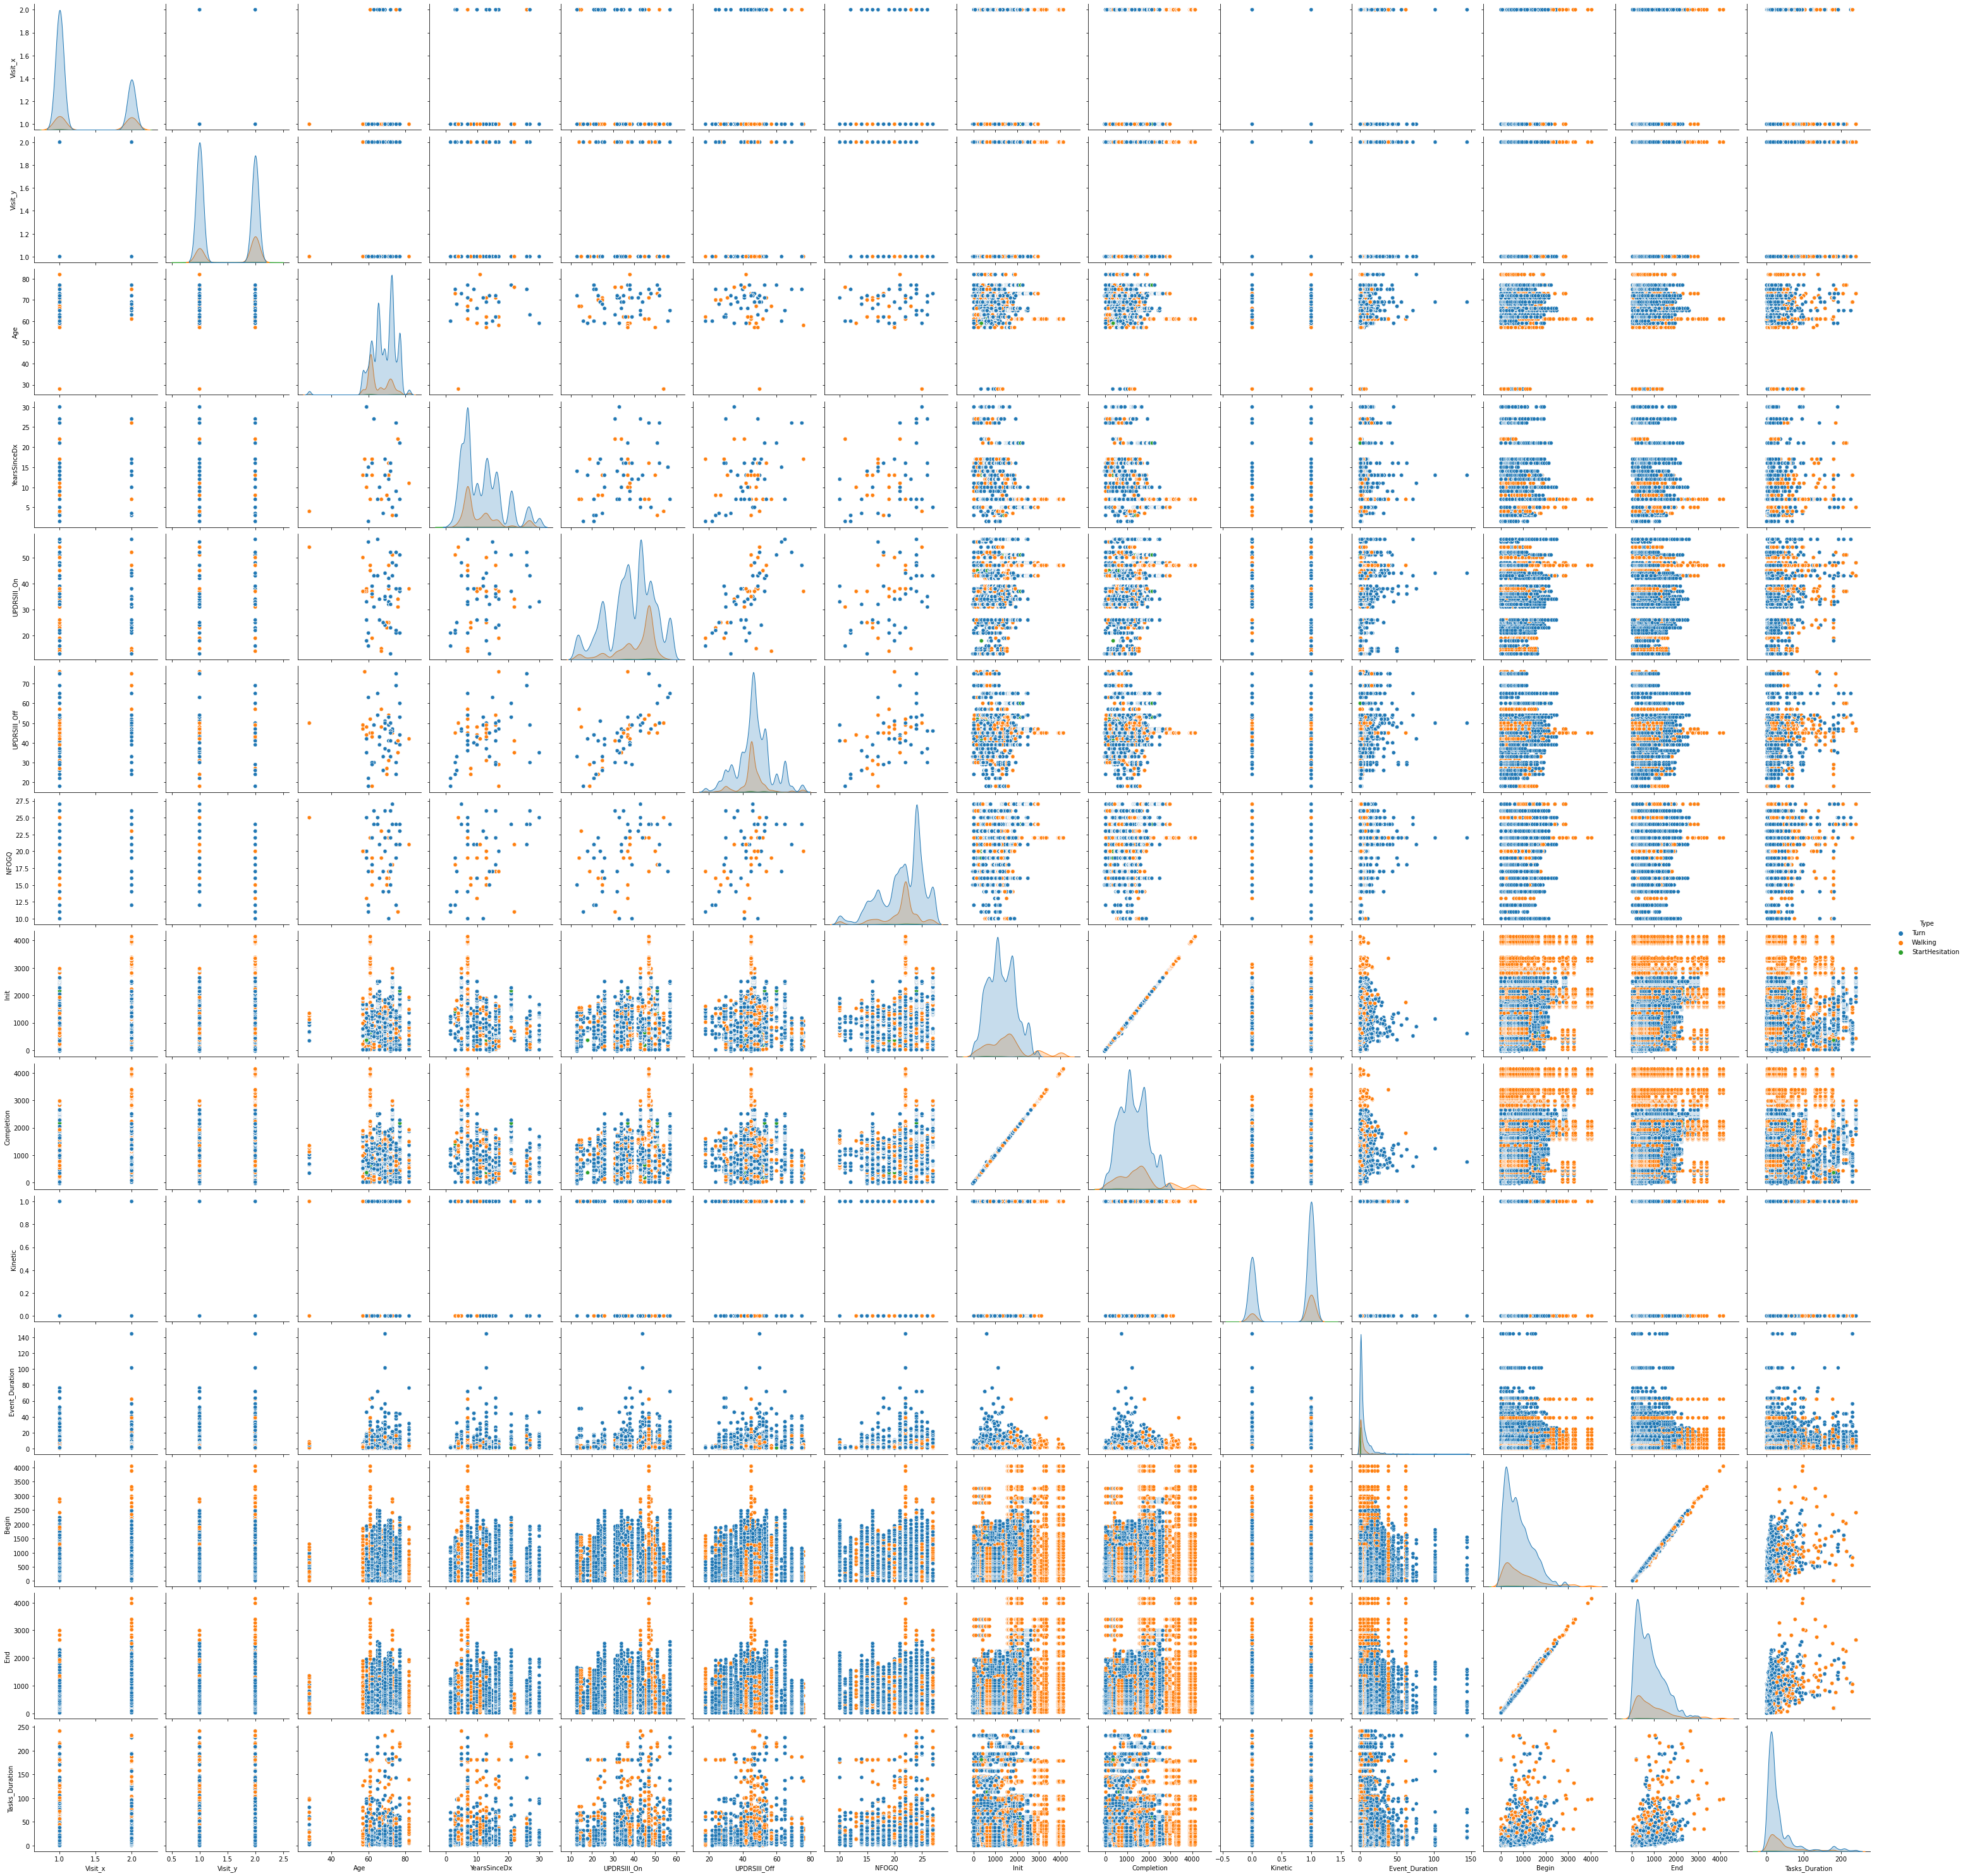

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
1  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
2  02ea782681  ae2d35        2         on      1.0   67   M           7.0   
3  02ea782681  ae2d35        2         on      2.0   67   M           7.0   
4  02ea782681  ae2d35        2         on      1.0   67   M           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ      Init  Completion  Type  Kinetic  \
0         15.0          48.0     23  1377.175    1378.089  Turn      1.0   
1         14.0          57.0     19  1377.175    1378.089  Turn      1.0   
2         15.0          48.0     23  1377.175    1378.089  Turn      1.0   
3         14.0          57.0     19  1377.175    1378.089  Turn      1.0   
4         15.0          48.0     23  1377.175    1378.089  Turn      1.0   

   Event_Duration    Begin      End   Task  Tasks_Duration  
0           0.914   10.000   21.618    4MW          11.618  
1           0.914   10.000   21.618    4MW          11.618  
2           0.914   99.404  111.200  4MW-C          11.796  
3           0.914   99.404  111.200  4MW-C          11.796  
4           0.914  174.440  177.909    MB1           3.469

In [13]:
sns.pairplot(data=meta, hue='Type', height=3)
plt.show()
meta.head()

## h.) Data Processing

In [14]:
sh_meta = meta.loc[(meta.Kinetic == 0) & (meta.Type == 'StartHesitation')].reset_index(drop=True)
walk_meta = meta.loc[(meta.Kinetic == 0) & (meta.Type == 'Walking')].reset_index(drop=True)
turn_meta = meta.loc[(meta.Kinetic == 0) & (meta.Type == 'Turn')].reset_index(drop=True)
processed_defog_meta = meta.loc[meta.Id.isin(sh_meta.Id) | meta.Id.isin(walk_meta.Id) | meta.Id.isin(turn_meta.Id)].reset_index(drop=True)
processed_defog_meta.head()

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   
1  06414383cf  8c1f5e        2        off      2.0   61   F           7.0   
2  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   
3  06414383cf  8c1f5e        2        off      2.0   61   F           7.0   
4  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ     Init  Completion  Type  Kinetic  \
0         45.0          52.0     22  384.703     386.323  Turn      0.0   
1         47.0          45.0     22  384.703     386.323  Turn      0.0   
2         45.0          52.0     22  384.703     386.323  Turn      0.0   
3         47.0          45.0     22  384.703     386.323  Turn      0.0   
4         45.0          52.0     22  384.703     386.323  Turn      0.0   

   Event_Duration    Begin      End    Task  Tasks_Duration  
0            1.62   10.000   34.860     4MW          24.860  
1            1.62   10.000   34.860     4MW          24.860  
2            1.62  110.783  134.394   4MW-C          23.611  
3            1.62  110.783  134.394   4MW-C          23.611  
4            1.62  215.396  233.757  TUG-ST          18.361

## i.) Data Ploting - 2

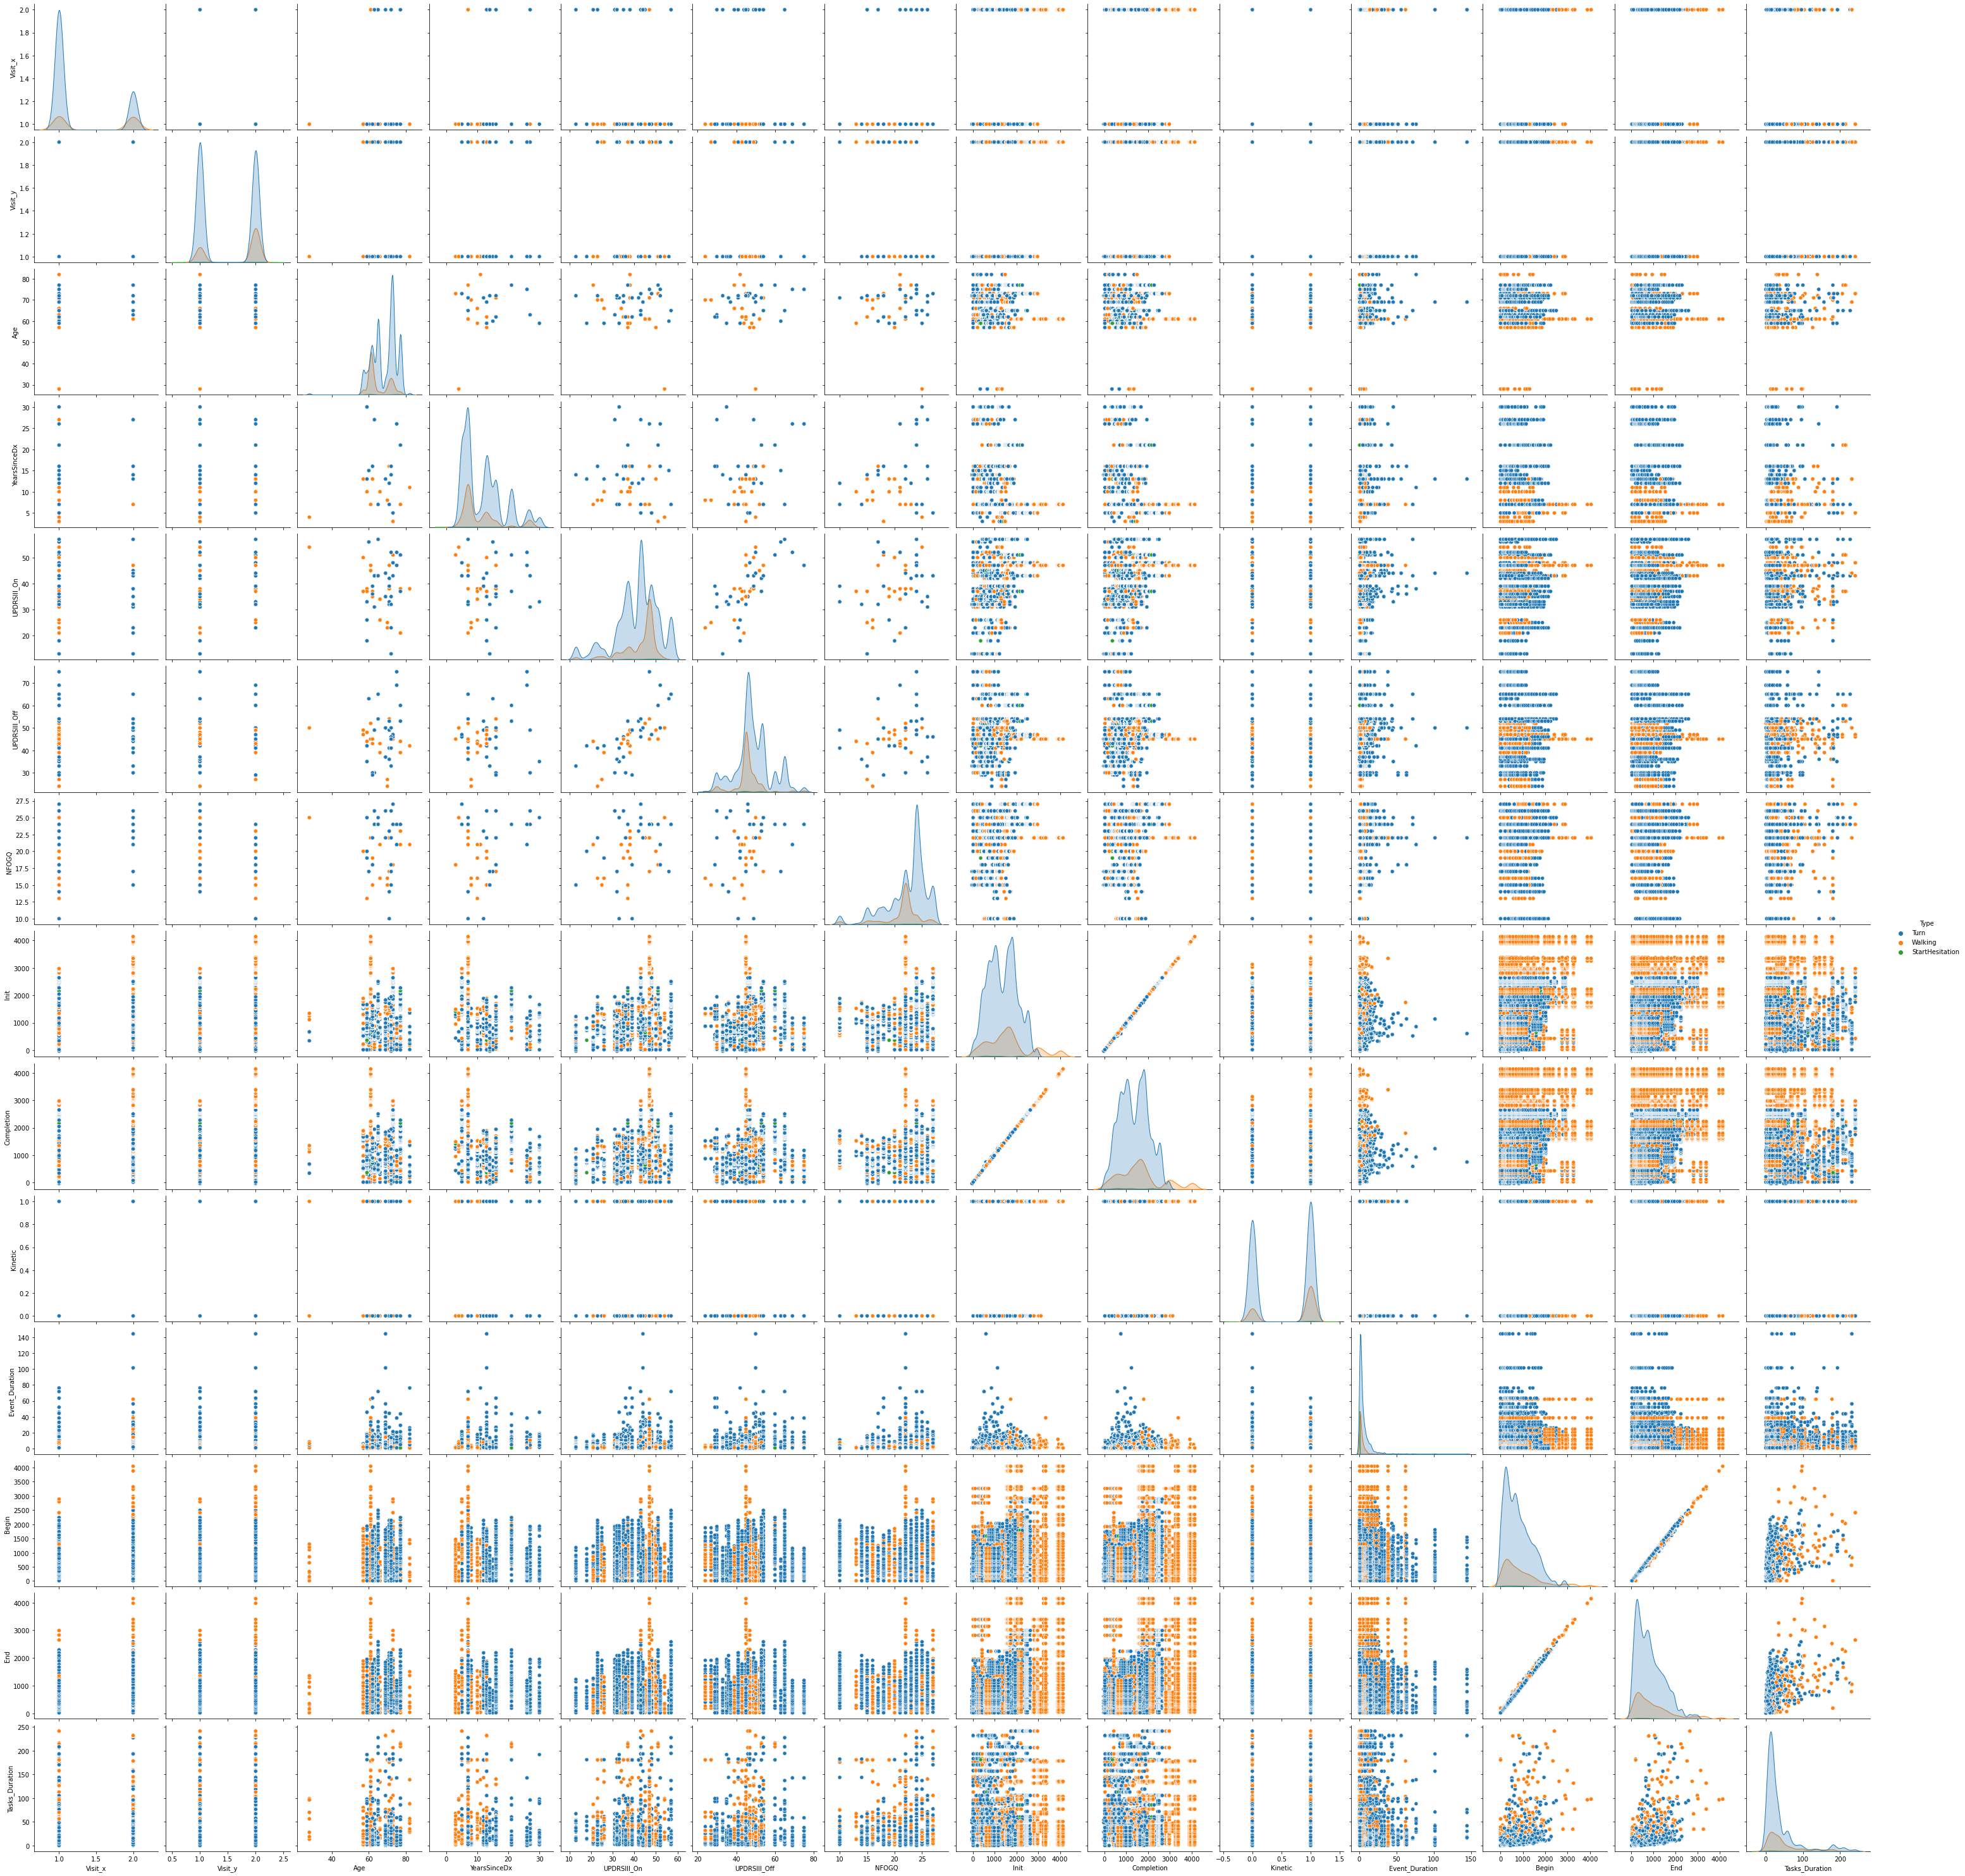

Id Subject  Visit_x Medication  Visit_y  Age Sex  YearsSinceDx  \
0  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   
1  06414383cf  8c1f5e        2        off      2.0   61   F           7.0   
2  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   
3  06414383cf  8c1f5e        2        off      2.0   61   F           7.0   
4  06414383cf  8c1f5e        2        off      1.0   61   F           7.0   

   UPDRSIII_On  UPDRSIII_Off  NFOGQ     Init  Completion  Type  Kinetic  \
0         45.0          52.0     22  384.703     386.323  Turn      0.0   
1         47.0          45.0     22  384.703     386.323  Turn      0.0   
2         45.0          52.0     22  384.703     386.323  Turn      0.0   
3         47.0          45.0     22  384.703     386.323  Turn      0.0   
4         45.0          52.0     22  384.703     386.323  Turn      0.0   

   Event_Duration    Begin      End    Task  Tasks_Duration  
0            1.62   10.000   34.860     4MW          24.860  
1            1.62   10.000   34.860     4MW          24.860  
2            1.62  110.783  134.394   4MW-C          23.611  
3            1.62  110.783  134.394   4MW-C          23.611  
4            1.62  215.396  233.757  TUG-ST          18.361

In [15]:
sns.pairplot(data=processed_defog_meta, hue='Type', height=3)
plt.show()
processed_defog_meta.head()

## j.) Saving Processed Metadata

In [16]:
processed_defog_meta.to_csv(main_path+'/processed/processed_defog_metadata.csv')